In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import calibration
reload(calibration);
from calibration import *
import pandas as pd
from tqdm import trange
import os

In [2]:
months = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11']
month_dict = {}
for month in months:
    search_string = ""
    month_dict[month] = glob.glob("/home/scratch/dbautist/CHIME_temp/*24%s*SRD"%month)

In [3]:
# feb = glob.glob("/users/dbautist/CHIME_landing_directory/learmonthData/*2402*SRD")
# mar = glob.glob("/users/dbautist/CHIME_landing_directory/learmonthData/*2403*SRD")
# apr = glob.glob("/users/dbautist/CHIME_landing_directory/learmonthData/*2404*SRD")
# may = glob.glob("/users/dbautist/CHIME_landing_directory/learmonthData/*2405*SRD")

In [4]:
day_path = month_dict['11'][0]
df = load_Learmonth_data(day_path)

# Data exploration

Text(0.5, 1.0, 'L241101.SRD')

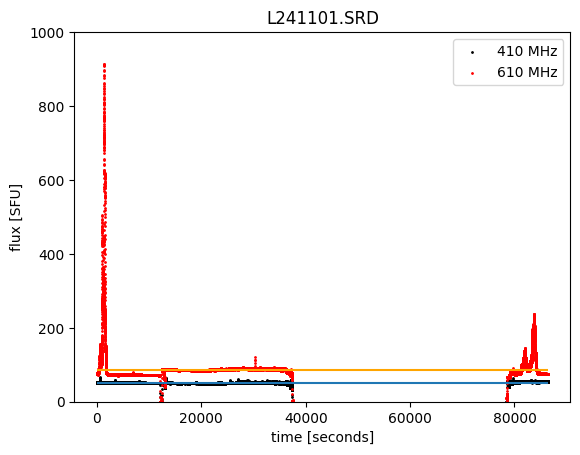

In [5]:
plt.figure()
plt.scatter(df["seconds"], df["410"], s=1, c='k', label="410 MHz")
plt.scatter(df["seconds"], df["610"], s=1, c='r', label="610 MHz")
plt.legend()
plt.xlabel("time [seconds]")
plt.ylabel("flux [SFU]")
plt.ylim(0,1000)
plt.hlines(np.nanmedian(df["410"]), 0, 3600*24, label="410 MHz median")
plt.hlines(np.nanmedian(df["610"]), 0, 3600*24, label="610 MHz median", color="orange")
plt.title(f"{os.path.basename(day_path)}")
# plt.savefig("/users/dbautist/CHIME_landing_directory/confluence/LSO_example_plot.png", bbox_inches="tight", transparent=False)


In [6]:
date_str = os.path.basename(day_path)[1:-4]
time_UTC = datetime.strptime(date_str, "%y%m%d")
int(time_UTC.strftime("%j"))

306

In [7]:
def get_day_number(filepath):
    date_str = os.path.basename(filepath)[1:-4]
    time_UTC = datetime.strptime(date_str, "%y%m%d")
    return int(time_UTC.strftime("%j"))

In [8]:
def loop_bool(df):
    check_median = (not np.isnan(np.nanmedian(df["410"]))) and np.nanmedian(df["410"]) != 0 and np.nanmedian(df["410"]) != 1 and np.nanmedian(df["410"]) > 0
    result  = check_median
    return result

In [9]:
tolerance = 10
n_hours = 4
sec_per_hr = 3600

sufficient_data = []
insufficient_data = []

days_list = []
list_410 = []
list_610 = []

for month in months:
    print("month:", month)
    for i in trange(len(month_dict[month])):
        this_path = month_dict[month][i]
        df = load_Learmonth_data(this_path)
        sun_track = reduce_learmonth_data(df, tolerance=tolerance, key="410")
        if loop_bool(df):
            sufficient_data.append(this_path)
        else:
            insufficient_data.append(this_path)
        list_410.append(np.nanmedian(df["410"]))
        list_610.append(np.nanmedian(df["610"]))
        days_list.append(get_day_number(this_path))

month: 02


  0%|          | 0/25 [00:00<?, ?it/s]

/users/dbautist/CHIME_landing_directory/calibration.py:199: RuntimeWarning: All-NaN slice encountered
  mask = np.where(np.abs(df[key].values - np.nanmedian(df[key])) < tolerance)
/tmp/ipykernel_1283627/959798313.py:2: RuntimeWarning: All-NaN slice encountered
  check_median = (not np.isnan(np.nanmedian(df["410"]))) and np.nanmedian(df["410"]) != 0 and np.nanmedian(df["410"]) != 1 and np.nanmedian(df["410"]) > 0
/tmp/ipykernel_1283627/382851418.py:22: RuntimeWarning: All-NaN slice encountered
  list_410.append(np.nanmedian(df["410"]))
/tmp/ipykernel_1283627/382851418.py:23: RuntimeWarning: All-NaN slice encountered
  list_610.append(np.nanmedian(df["610"]))
100%|██████████| 25/25 [02:04<00:00,  5.00s/it]


month: 03


100%|██████████| 31/31 [02:02<00:00,  3.96s/it]


month: 04


100%|██████████| 30/30 [02:30<00:00,  5.01s/it]


month: 05


 65%|██████▍   | 20/31 [01:41<00:55,  5.04s/it]

Text(0, 0.5, 'Flux [SFU]')

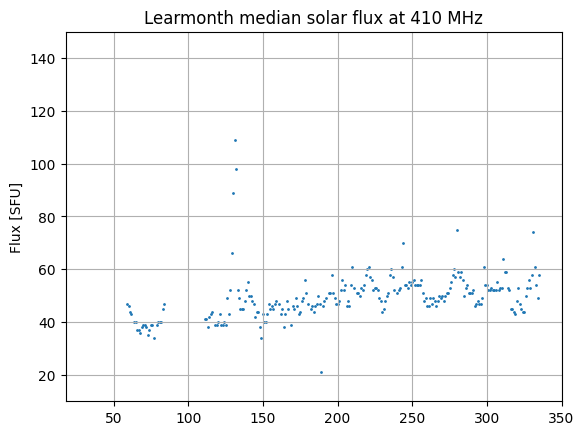

In [ ]:
plt.figure()
plt.scatter(days_list, list_410, s=1)
# plt.scatter(np.arange(len(mar_410)) + len(feb_410), mar_410, s=1)
# plt.scatter(np.arange(len(apr_410)) + len(feb_410) + len(mar_410), apr_410, s=1)
# plt.scatter(np.arange(len(may_410)) + len(feb_410) + len(mar_410) + len(apr_410), may_410, s=1)
plt.ylim(10, 150)
plt.grid()
plt.title("Learmonth median solar flux at 410 MHz")
plt.ylabel("Flux [SFU]")

Text(0, 0.5, 'Flux [SFU]')

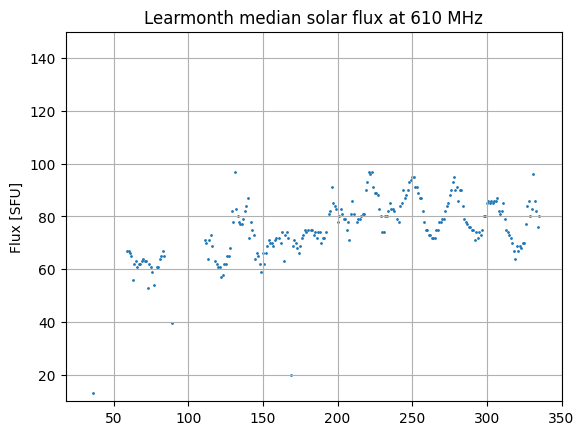

In [ ]:
plt.figure()
plt.scatter(days_list, list_610, s=1)
# plt.scatter(np.arange(len(mar_410)) + len(feb_410), mar_410, s=1)
# plt.scatter(np.arange(len(apr_410)) + len(feb_410) + len(mar_410), apr_410, s=1)
# plt.scatter(np.arange(len(may_410)) + len(feb_410) + len(mar_410) + len(apr_410), may_410, s=1)
plt.ylim(10, 150)
plt.grid()
plt.title("Learmonth median solar flux at 610 MHz")
plt.ylabel("Flux [SFU]")

# Checking data quality

In [ ]:
len(sufficient_data), len(insufficient_data)

(62, 52)

In [ ]:
os.path.basename(insufficient_data[27]).replace(".SRD", ".png")

'L240327.png'

# Plotting the good data

In [ ]:
def get_day(path):
    filename = os.path.basename(path).replace(".SRD", "")
    YYMMDD = filename[1:]
    datetime_obj = datetime.strptime(YYMMDD, "%y%m%d")
    return int(datetime_obj.strftime("%j"))

get_day(sufficient_data[0])

59

In [ ]:
days = []
flux_410 = []
flux_610 = []

for i in trange(len(sufficient_data)):
    path = sufficient_data[i]
    df = load_Learmonth_data(path)
    days.append(get_day(path))
    flux_410.append(np.nanmedian(df["410"]))
    flux_610.append(np.nanmedian(df["610"]))
    

100%|██████████| 62/62 [04:57<00:00,  4.80s/it]


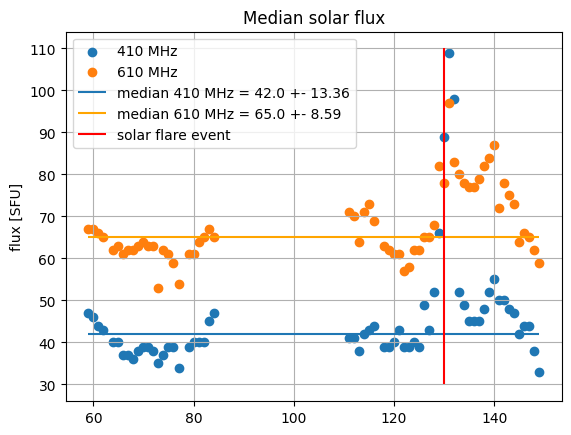

In [ ]:
plt.figure()
plt.scatter(days, flux_410, label="410 MHz")
plt.scatter(days, flux_610, label="610 MHz")
plt.title("Median solar flux")
plt.ylabel("flux [SFU]")
plt.grid()
plt.hlines(np.median(flux_410), min(days), max(days), label=f"median 410 MHz = {np.median(flux_410)} +- %s"%np.round(np.std(flux_410), 2))
plt.hlines(np.median(flux_610), min(days), max(days), color='orange', label=f"median 610 MHz = {np.median(flux_610)} +- %s"%np.round(np.std(flux_610), 2))
plt.vlines(130, 30, 110, label="solar flare event", color="red")
plt.legend()
plt.savefig("/users/dbautist/CHIME_landing_directory/confluence/solar_flux.png", transparent=False, bbox_inches="tight")

In [ ]:
with open("/users/dbautist/CHIME_landing_directory/learmonthData/good_data.txt", "w") as f:
    for file in sufficient_data:
        f.write(f"{file}\n")